Sınıf sayısı: 99


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 190, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 95, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 93, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2944)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       376,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 99)             │        12,771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,067 (1.51 MB)

 Trainable params: 396,067 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0093 - loss: 4.6448 - val_accuracy: 0.0505 - val_loss: 4.5325
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0493 - loss: 4.4167 - val_accuracy: 0.0606 - val_loss: 4.3817
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0899 - loss: 4.0716 - val_accuracy: 0.0707 - val_loss: 4.1754
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1924 - loss: 3.5465 - val_accuracy: 0.1313 - val_loss: 3.8495
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2758 - loss: 3.0068 - val_accuracy: 0.2424 - val_loss: 3.4545
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4208 - loss: 2.4098 - val_accuracy: 0.2929 - val_loss: 3.1311
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4952 - loss: 1.9515 - val_accuracy: 0.3030 - val_loss: 2.8127
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5759 - loss: 1.5666 - val_accuracy: 0.4242 - val_loss:

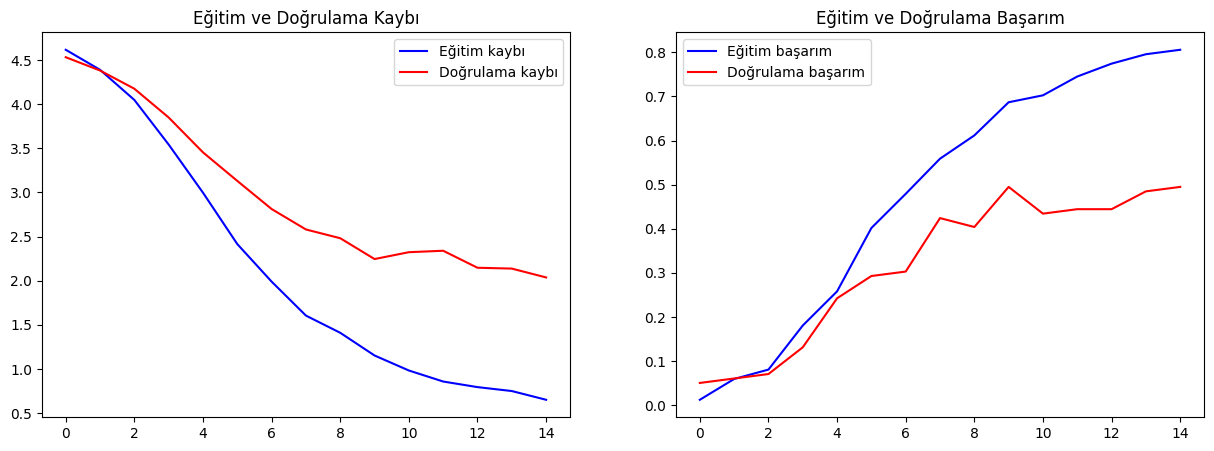

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerekli kütüphaneler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten,
                                     Dense, Dropout, Activation)
from tensorflow.keras.utils import to_categorical

# 1) Verilerin yüklenmesi
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 2) Sınıfların etiketlenmesi
label_encoder = LabelEncoder().fit(train["species"])
labels = label_encoder.transform(train["species"])
classes = list(label_encoder.classes_)
print(f"Sınıf sayısı: {len(classes)}")

# 3) Eğitim ve test verisinin hazırlanması
train = train.drop(["id", "species"], axis=1)
test = test.drop(["id"], axis=1)

nb_features = 192  # Dosyanızdaki gerçek özellik sayısı
nb_classes = len(classes)
assert train.shape[1] == nb_features, f"Özellik sayısı beklenmiyor! {train.shape[1]} vs {nb_features}"

# 4) Standardizasyon (sadece train'e fit, test'e de uygula)
scaler = StandardScaler().fit(train.values)
train = scaler.transform(train.values)
test = scaler.transform(test.values)

# 5) Eğitim/Doğrulama ayrımı
X_train, X_valid, y_train_raw, y_valid_raw = train_test_split(
    train, labels, test_size=0.1, random_state=42
)

# 6) Etiketleri kategorikleştirme
y_train = to_categorical(y_train_raw, num_classes=nb_classes)
y_valid = to_categorical(y_valid_raw, num_classes=nb_classes)

# 7) 1D CNN için verileri reshape etme (samples, features, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], nb_features, 1)
X_valid = np.array(X_valid).reshape(X_valid.shape[0], nb_features, 1)

# 8) Modelin oluşturulması
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(nb_features,1), activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.summary()

# 9) Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 10) Modelin eğitilmesi
history = model.fit(
    X_train, y_train,
    epochs=15,  # İsteğe göre artırılabilir
    validation_data=(X_valid, y_valid),
    verbose=1
)

# 11) Ortalama değerler
print("\nOrtalama Eğitim Kaybı:", np.mean(history.history['loss']))
print("Ortalama Eğitim Başarımı:", np.mean(history.history['accuracy']))
print("Ortalama Doğrulama Kaybı:", np.mean(history.history['val_loss']))
print("Ortalama Doğrulama Başarımı:", np.mean(history.history['val_accuracy']))

# 12) Grafik üzerinde sonuçlar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(history.history['loss'], color='b', label="Eğitim kaybı")
ax1.plot(history.history['val_loss'], color='r', label="Doğrulama kaybı")
ax1.set_title("Eğitim ve Doğrulama Kaybı")
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Eğitim başarım")
ax2.plot(history.history['val_accuracy'], color='r', label="Doğrulama başarım")
ax2.set_title("Eğitim ve Doğrulama Başarım")
ax2.legend()

plt.show()